In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [15]:
# 2. Simulate a Sample Dataset (Replace this with actual dataset later)
np.random.seed(42)
data = pd.DataFrame({
    'loan_amnt': np.random.randint(1000, 40000, 1000),
    'term': np.random.choice([36, 60], 1000),
    'int_rate': np.random.uniform(5, 25, 1000),
    'emp_length': np.random.randint(0, 11, 1000),
    'annual_inc': np.random.normal(60000, 15000, 1000).astype(int),
    'credit_score': np.random.randint(600, 850, 1000),
    'dti': np.random.uniform(5, 30, 1000),
    'loan_status': np.random.choice([0, 1], 1000, p=[0.8, 0.2])  # 0 = No Default, 1 = Default
})

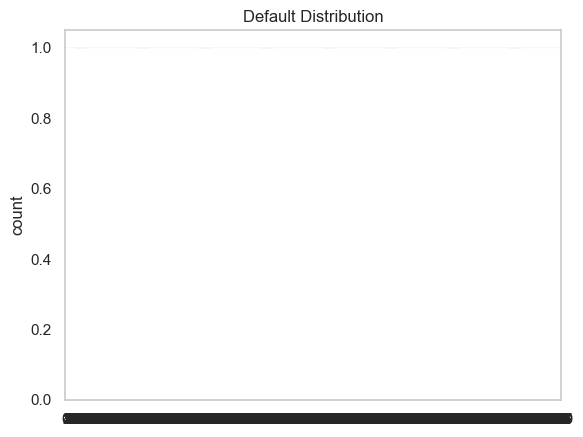

In [28]:
# 3. EDA (Optional but good for exploration)
sns.countplot(data['loan_status'])
plt.title("Default Distribution")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17292\2991404142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_status', data=data, palette=colors)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17292\2991404142.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x='loan_status', data=data, palette=colors)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17292\2991404142.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


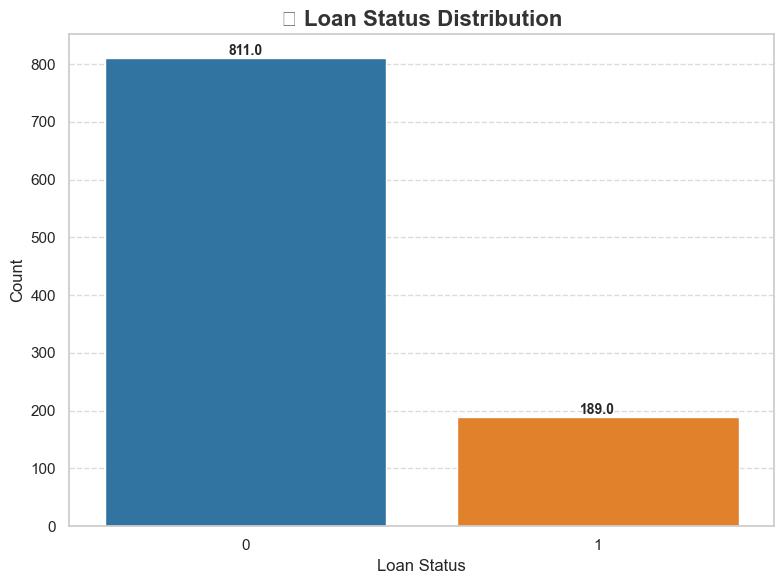

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for beautiful plots
sns.set(style="whitegrid")

# Define a vibrant color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_status', data=data, palette=colors)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set titles and labels
plt.title("📊 Loan Status Distribution", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-ticks if needed
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
# 4. Split features & target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [19]:

# 5. Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [20]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [21]:
# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# 8. Train Classifier Models
# --- LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)

# --- SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


[LightGBM] [Info] Number of positive: 581, number of negative: 554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 1135, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511894 -> initscore=0.047586
[LightGBM] [Info] Start training from score 0.047586


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [23]:
# 9. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))


In [24]:
# 10. Evaluation Reports
evaluate_model(y_test, y_pred_lgbm, "LightGBM")
evaluate_model(y_test, y_pred_svm, "SVM")


Model: LightGBM
[[213  44]
 [ 48 182]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       257
           1       0.81      0.79      0.80       230

    accuracy                           0.81       487
   macro avg       0.81      0.81      0.81       487
weighted avg       0.81      0.81      0.81       487


Model: SVM
[[198  59]
 [ 70 160]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       257
           1       0.73      0.70      0.71       230

    accuracy                           0.74       487
   macro avg       0.73      0.73      0.73       487
weighted avg       0.73      0.74      0.73       487

